In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy import stats
from sklearn.preprocessing import normalize
from scipy.stats import kstest, chisquare # tests
from scipy.stats import gamma, beta, norm, lognorm # distributions
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls "/content/drive/MyDrive/MDALabs/lab1/data/train_timeseries/"

train_timeseries.csv


In [ ]:
# data = pd.read_csv("/content/drive/MyDrive/MDALabs/lab1/data/train_timeseries/train_timeseries.csv").sample(1000000)
data = pd.read_csv("/content/drive/MyDrive/train_timeseries-002.csv")

In [ ]:
data.shape

(19300680, 21)

In [ ]:
def delete_extreme_p(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    under_border, top_border = q1 - 1.5*iqr, q3 + 1.5*iqr
    data = data[data > under_border]
    data = data[data < top_border]
    return data

In [ ]:
chosen_columns = ['PRECTOT', 'PS', 'T2MDEW', 'T2M_RANGE', 'WS10M', 'T2M', 'QV2M', 'T2MWET']

# Новый раздел

In [ ]:
data.head()

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2000-01-01,0.22,100.51,9.65,14.74,13.51,13.51,20.96,11.46,9.50,14.65,2.20,2.94,1.49,1.46,4.85,6.04,3.23,2.81,NaN
1,1001,2000-01-02,0.20,100.55,10.42,16.69,14.71,14.71,22.80,12.61,10.18,16.60,2.52,3.43,1.83,1.60,5.33,6.13,3.72,2.41,NaN
2,1001,2000-01-03,3.65,100.15,11.76,18.49,16.52,16.52,22.73,15.32,7.41,18.41,4.03,5.33,2.66,2.67,7.53,9.52,5.87,3.66,NaN
3,1001,2000-01-04,15.95,100.29,6.42,11.40,6.09,6.10,18.09,2.16,15.92,11.31,3.84,5.67,2.08,3.59,6.73,9.31,3.74,5.58,1.0
4,1001,2000-01-05,0.00,101.15,2.95,3.86,-3.29,-3.20,10.82,-2.66,13.48,2.65,1.60,2.50,0.52,1.98,2.94,4.85,0.65,4.19,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


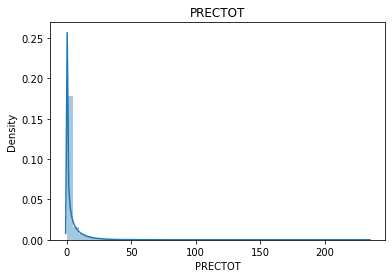

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


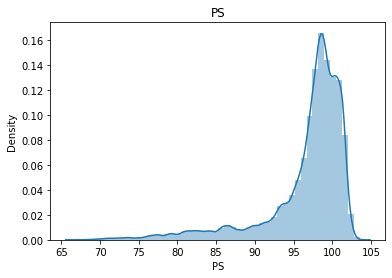

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


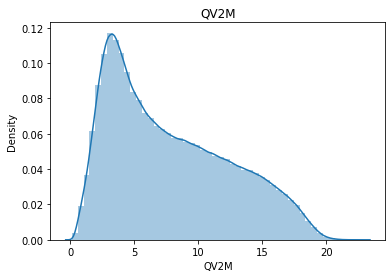

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


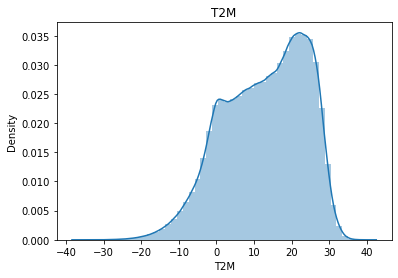

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


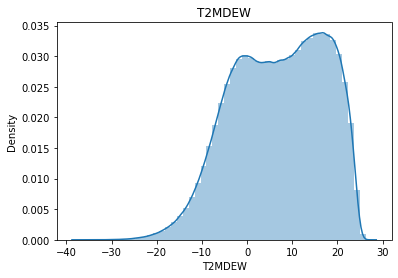

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


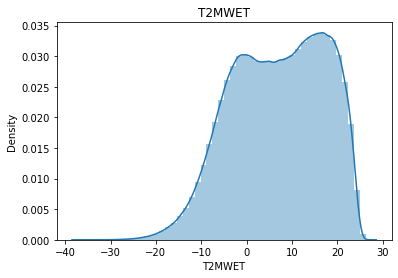

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


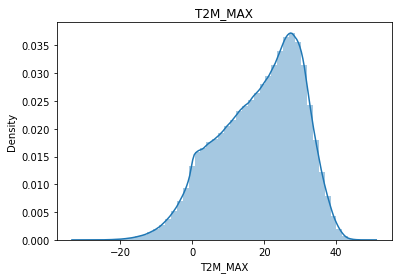

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


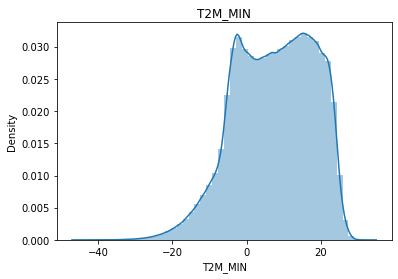

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


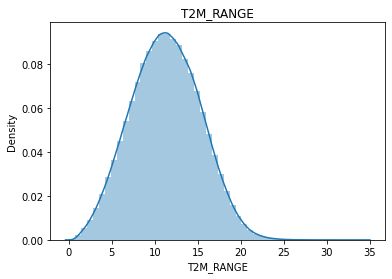

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


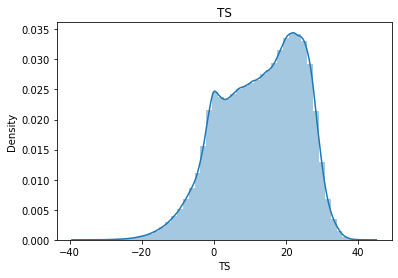

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


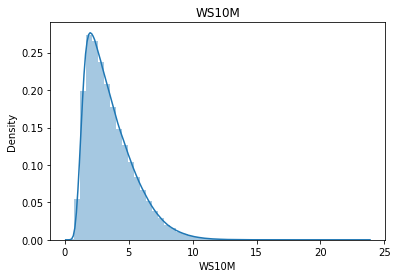

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


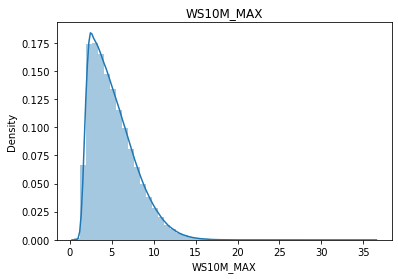

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


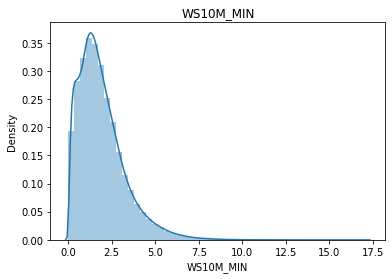

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


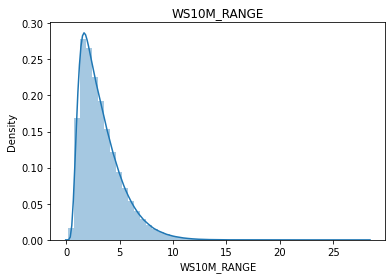

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


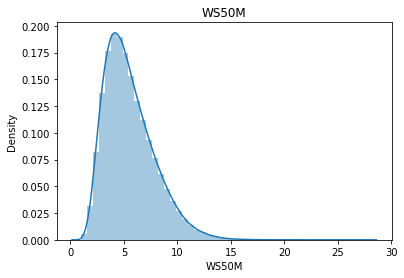

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


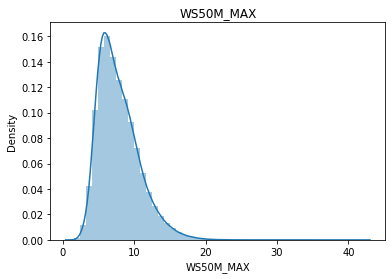

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


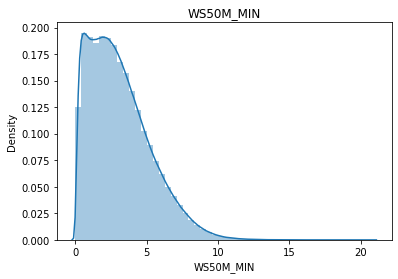

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


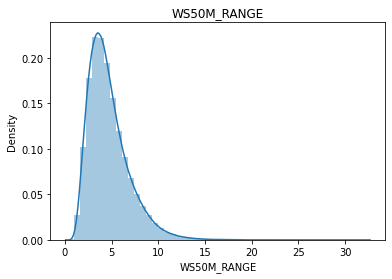

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


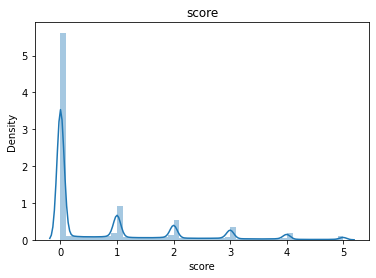

In [ ]:
for col in data.columns[2:]:
    sns.distplot(data[col])
    plt.title(col)
    plt.show()

In [ ]:
for col in chosen_columns:
  print(col)
  print(np.var(data[col]))


PRECTOT
38.7668690862344
PS
29.68064087978948
T2MDEW
102.93130422726904
T2M_RANGE
16.041342167472145
WS10M
3.468148639882829
T2M
119.39364224163855
QV2M
22.036499422214405
T2MWET
101.83150045574237


In [ ]:
for col in chosen_columns:
  print(col)
  print(np.mean(data[col]))

PRECTOT
2.6441445389608655
PS
96.6557845516096
T2MDEW
6.951072110931337
T2M_RANGE
11.269744640083703
WS10M
3.564012746700667
T2M
12.801455011948088
QV2M
7.816178413920823
T2MWET
6.9869157822416526


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


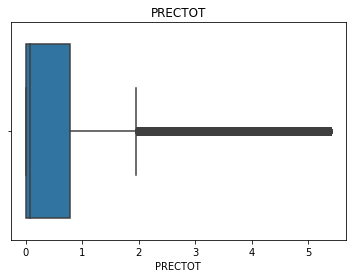

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


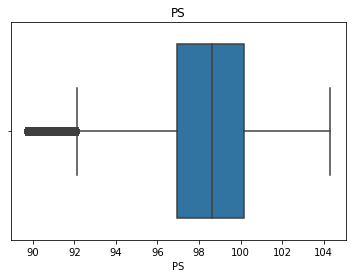

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


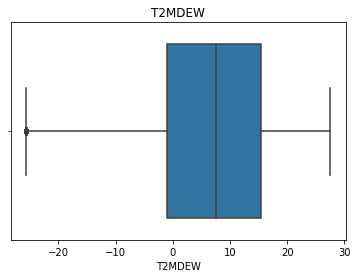

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


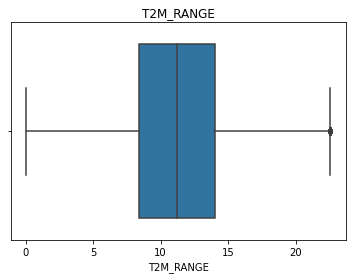

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


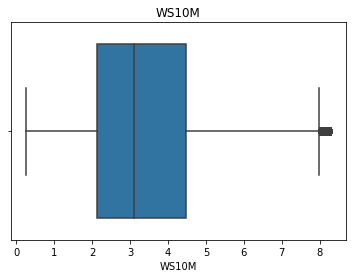

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


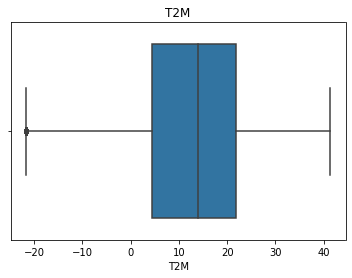

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


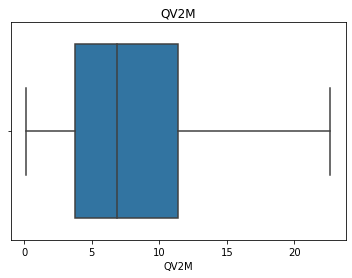

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


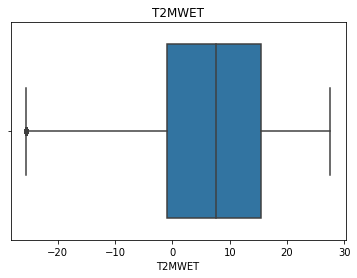

In [ ]:
for col in chosen_columns:
    sns.boxplot(delete_extreme_p(data[col]))
    plt.title(col)
    plt.show()

In [ ]:
data.sample(1)[chosen_columns]

,PRECTOT,PS,T2MDEW,T2M_RANGE,WS10M,T2M,QV2M,T2MWET
19026625,0.0,98.39,0.07,13.38,3.81,5.62,3.91,0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 2880x2880 with 0 Axes>

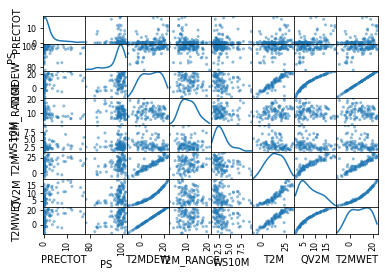

In [ ]:
plt.figure(figsize=(40, 40))
pd.plotting.scatter_matrix(data.sample(100)[chosen_columns], diagonal="kde")
plt.tight_layout()
plt.show()

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

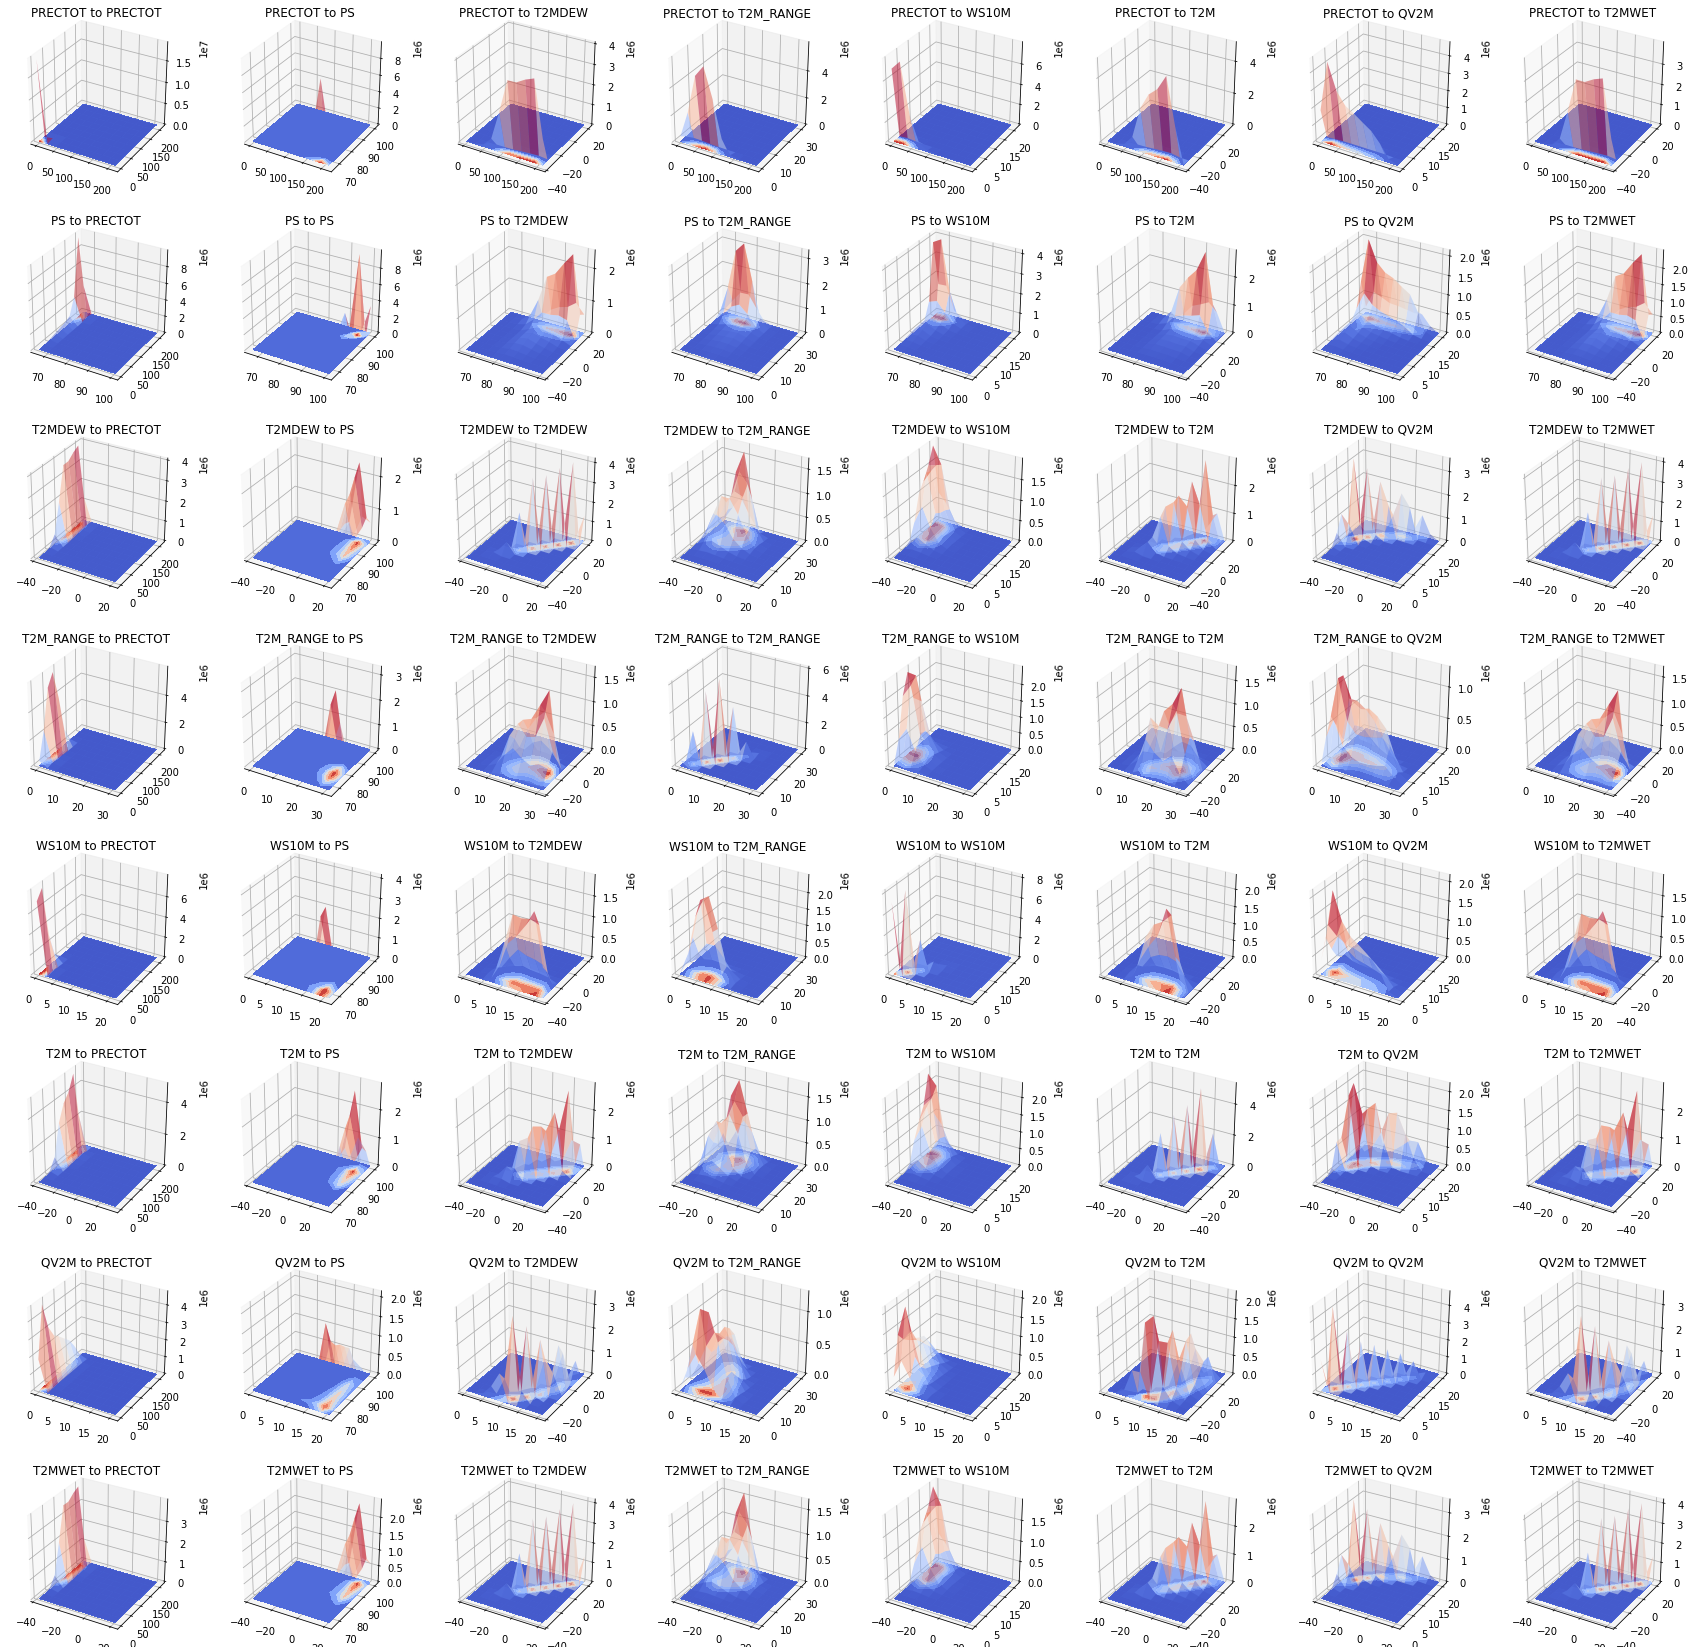

In [ ]:
fig = plt.figure(figsize=(30, 30))

k = 1
for i, col_x in tqdm(enumerate(chosen_columns)):
    for j, col_y in tqdm(enumerate(chosen_columns), leave=False):
        ax = fig.add_subplot(len(chosen_columns), len(chosen_columns), k, projection='3d')
        ax.set_title(f'{col_x} to {col_y}')
        X = data[col_x]
        Y = data[col_y]
        hist, x_bins, y_bins = np.histogram2d(X, Y)

        X, Y = np.meshgrid(x_bins[:-1], y_bins[:-1])
        Z = hist

        # Plot the surface.
        surf = ax.plot_surface(X, Y, Z, 
                               cmap=plt.cm.get_cmap('coolwarm'), 
                               rstride=1, cstride=1, alpha=0.5)
        cset = ax.contourf(X, Y, Z, zdir='z', offset=Z.min(), cmap=plt.cm.get_cmap('coolwarm'))
        # cset = ax.contourf(X, Y, Z, zdir='x', offset=X.min(), cmap=plt.cm.get_cmap('coolwarm'))
        # cset = ax.contourf(X, Y, Z, zdir='y', offset=Y.min(), cmap=plt.cm.get_cmap('coolwarm'))
        k += 1
plt.show()

# Step 4
Pair correlation coefficients, confidence intervals and significance levels

In [ ]:
def pair_correlation(x, y):
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)

    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se

    return r, p, lo_z, hi_z

In [ ]:
coeffs = np.zeros((len(chosen_columns), len(chosen_columns)))
lo_zs = np.zeros((len(chosen_columns), len(chosen_columns)))
hi_zs = np.zeros((len(chosen_columns), len(chosen_columns)))
p_vals = np.zeros((len(chosen_columns), len(chosen_columns)))

for i, col_x in tqdm(enumerate(chosen_columns)):
    for j, col_y in tqdm(enumerate(chosen_columns), leave=False):
        coeffs[i][j], p_vals[i][j], lo_zs[i][j], hi_zs[i][j] \
             = pair_correlation(data[col_x], data[col_y])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in arctanh
  This is separate from the ipykernel package so we can avoid doing imports until


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [ ]:
p_vals

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
i, j = 0, 1
coeffs[i][j], lo_zs[i][j], hi_zs[i][j], p_vals[i][j], hi_zs[i][j] - lo_zs[i][j] 

(0.06763306877831902,
 0.06729034544549646,
 0.06818260624937351,
 0.0,
 0.0008922608038770541)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


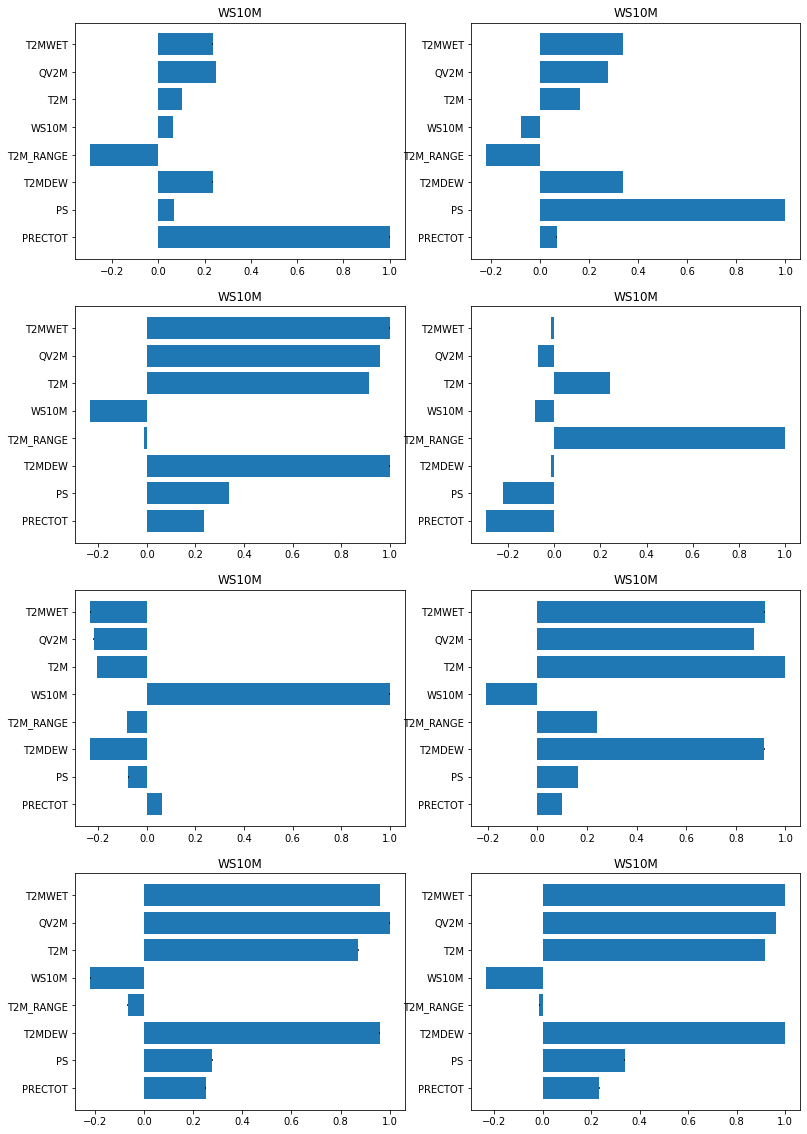

In [ ]:
_, ax = plt.subplots(4, 2, figsize=(13, 20))
k = 0
for i in range(4):
    for j in range(2):
        ax[i][j].set_title(col)

        err = hi_zs[k] - lo_zs[k]
        ax[i][j].barh(chosen_columns, coeffs[k], xerr=err)
        k += 1
plt.show()

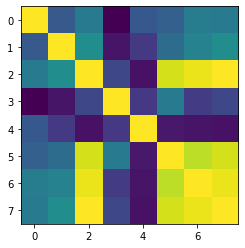

In [ ]:
plt.imshow(coeffs)

## Step 5, 6

### Without Polynomian

#### T2MWET feature

In [ ]:
def corr(arr1, arr2):
    mean1 = arr1.mean()
    mean2 = arr2.mean()
    return np.round(np.sum((arr1 - mean1) * (arr2 - mean2)) /
                    np.sqrt(np.sum((arr1 - mean1)**2)*np.sum((arr2 - mean2)**2)), 2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

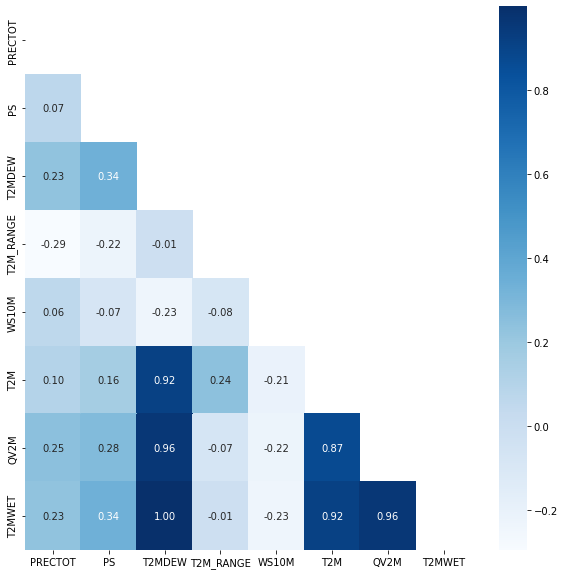

In [ ]:
dataset = data[chosen_columns]
correlation_matrix = dataset.corr()
mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(correlation_matrix, mask = mask, annot=True, fmt= '.2f', ax = ax, cmap = 'Blues')
plt.show()

In [ ]:
X_columns = ['PRECTOT', 'PS', 'WS10M', 'T2M_RANGE', 'T2M', 'QV2M', 'T2MDEW']
Y_columns = ['T2MWET'] 

X = normalize(data[X_columns])
y = data[Y_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x = [i for i in range(len(y_test))]

In [ ]:
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)
params = np.append(linreg.intercept_, linreg.coef_)

predicted = y_pred
real = y_test.to_numpy()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mape = mean_absolute_percentage_error(real, predicted)
#print('Mean absolute percentage error = ', mape)

Mean absolute error =  0.32835329551859965
Mean squared error =  0.27553729584029224


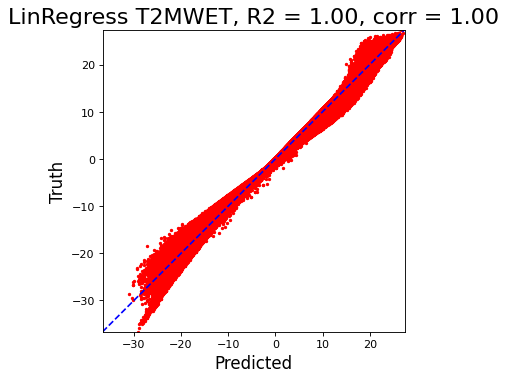

In [ ]:
min_, max_ = min( predicted.min(), real.min() ), max( predicted.max(), real.max() )

plt.figure(figsize=(5, 5), dpi=80)
plt.xlim(min_, max_)
plt.ylim(real.min(), max( predicted.max(), real.max() ))
plt.title(f"LinRegress T2MWET, R2 = {r2_score(real, predicted):.2f}, corr = {corr(real, predicted):.2f}", fontsize=20)
plt.scatter(predicted, real, s=4, c='r')
plt.plot([min_, max_], [min_, max_], 'b--')
plt.gca().set_aspect(1)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Truth", fontsize=15)
plt.show()

Text(0, 0.5, 'Prediction')

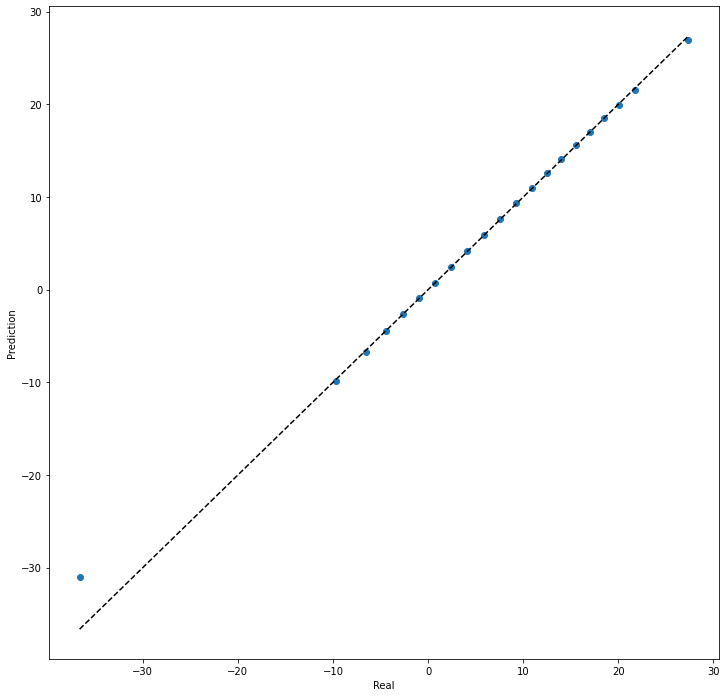

In [ ]:
# Plotting a quantile biplot based on real and predicted values
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(real, percs)
qn_second = np.percentile(predicted, percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Real')
plt.ylabel(u'Prediction')

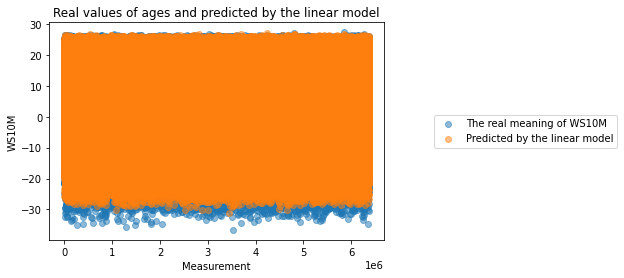

In [ ]:
x = [i for i in range(len(y_test))]

plt.scatter(x, real, label = u'The real meaning of WS10M', alpha=0.5)
plt.scatter(x, predicted, label = u'Predicted by the linear model', alpha=0.5)
plt.title(u'Real values of ages and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Measurement')
plt.ylabel(u'WS10M')
plt.show()

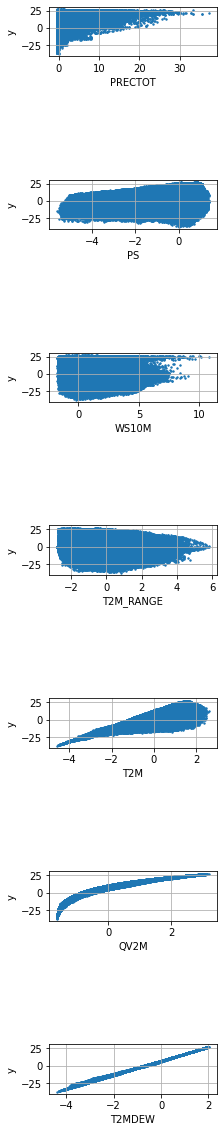

In [ ]:
# Visualization of the dependence of features among themselves
X = data[X_columns]
y = data[Y_columns]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = X_columns

fig, axs = plt.subplots(len(X_columns), 1, figsize=(3, 20))
plt.subplots_adjust(wspace=0, hspace=2.5)

for i, col in enumerate(X_columns):
  axs[i].scatter(X[[col]], y, s = 2)
  axs[i].set_xlabel(col)
  axs[i].set_ylabel('y')
  axs[i].grid(True)

#### WS10M feature

In [ ]:
X_columns = ['PRECTOT', 'PS', 'T2MWET', 'T2M_RANGE', 'T2M', 'QV2M', 'T2MDEW']
Y_columns = ['WS10M']

X = normalize(data[X_columns])
y = data[Y_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x = [i for i in range(len(y_test))]

linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)
params = np.append(linreg.intercept_, linreg.coef_)

predicted = y_pred
real = y_test.to_numpy()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(real, predicted)
print('Mean absolute percentage error = ', mape)

Mean absolute error =  1.3990470620798854
Mean squared error =  3.1784074206553914
Mean absolute percentage error =  50.11523959138853


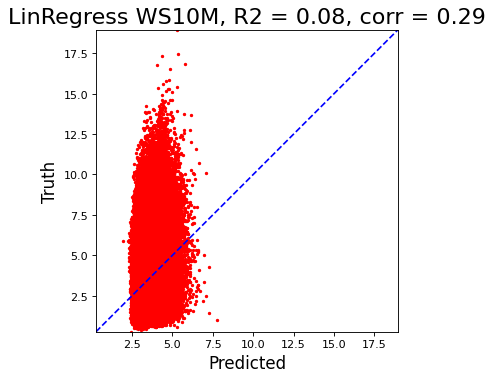

In [ ]:
min_, max_ = min( predicted.min(), real.min() ), max( predicted.max(), real.max() )

plt.figure(figsize=(5, 5), dpi=80)
plt.xlim(min_, max_)
plt.ylim(real.min(), max( predicted.max(), real.max() ))
plt.title(f"LinRegress WS10M, R2 = {r2_score(real, predicted):.2f}, corr = {corr(real, predicted):.2f}", fontsize=20)
plt.scatter(predicted, real, s=4, c='r')
plt.plot([min_, max_], [min_, max_], 'b--')
plt.gca().set_aspect(1)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Truth", fontsize=15)
plt.show()

Text(0, 0.5, 'Prediction')

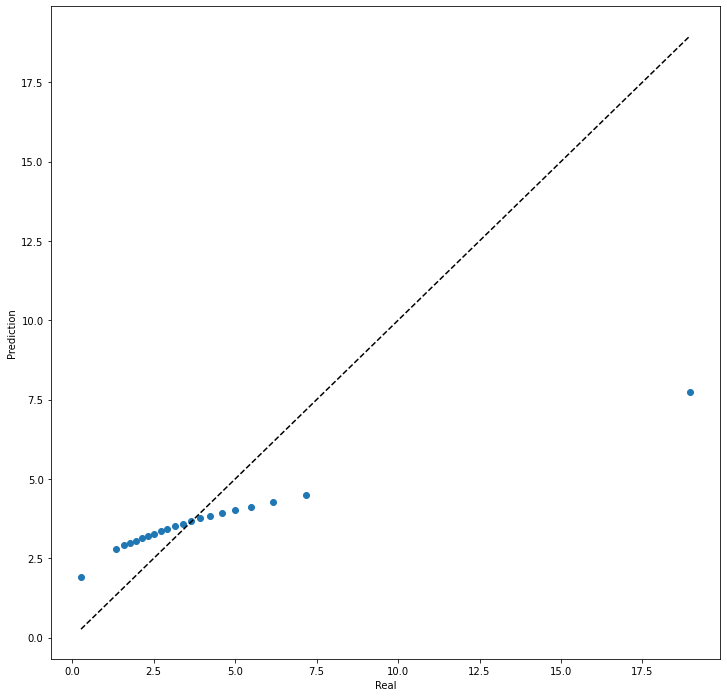

In [ ]:
# Plotting a quantile biplot based on real and predicted values
percs = np.linspace(0, 100, 21)
qn_first = np.percentile(real, percs)
qn_second = np.percentile(predicted, percs)
plt.figure(figsize=(12, 12))

min_qn = np.min([qn_first.min(), qn_second.min()])
max_qn = np.max([qn_first.max(), qn_second.max()])
x = np.linspace(min_qn, max_qn)

plt.plot(qn_first, qn_second, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")

plt.xlabel(u'Real')
plt.ylabel(u'Prediction')

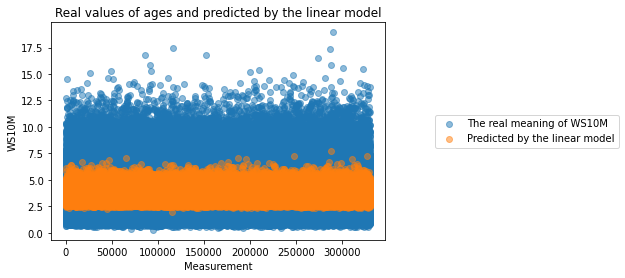

In [ ]:
x = [i for i in range(len(y_test))]

plt.scatter(x, real, label = u'The real meaning of WS10M', alpha=0.5)
plt.scatter(x, predicted, label = u'Predicted by the linear model', alpha=0.5)
plt.title(u'Real values of ages and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Measurement')
plt.ylabel(u'WS10M')
plt.show()

#### Polynomial case

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)

regr = LinearRegression().fit(X_train_new, y_train)
predicted = regr.predict(X_test_new)
real = y_test.to_numpy()

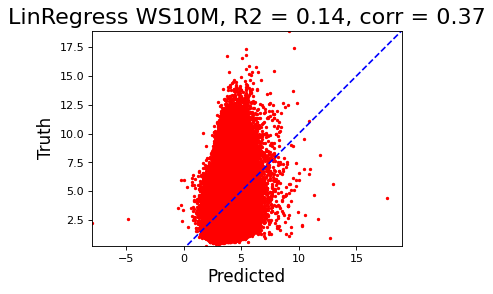

In [ ]:
min_, max_ = min( predicted.min(), real.min() ), max( predicted.max(), real.max() )

plt.figure(figsize=(5, 5), dpi=80)
plt.xlim(min_, max_)
plt.ylim(real.min(), max( predicted.max(), real.max() ))
plt.title(f"LinRegress WS10M, R2 = {r2_score(real, predicted):.2f}, corr = {corr(real, predicted):.2f}", fontsize=20)
plt.scatter(predicted, real, s=4, c='r')
plt.plot([min_, max_], [min_, max_], 'b--')
plt.gca().set_aspect(1)
plt.xlabel("Predicted", fontsize=15)
plt.ylabel("Truth", fontsize=15)
plt.show()